Polynomial regression is a type of regression analysis where the relationship between the independent variable(s) (X) and the dependent variable (y) is modeled as an nth-degree polynomial — instead of a straight line like in linear regression.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Polynomial_Regression.csv")
dataset.head(3)

,Level,Salary
0,1,1500.0
1,2,16970.0
2,3,70148.0


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

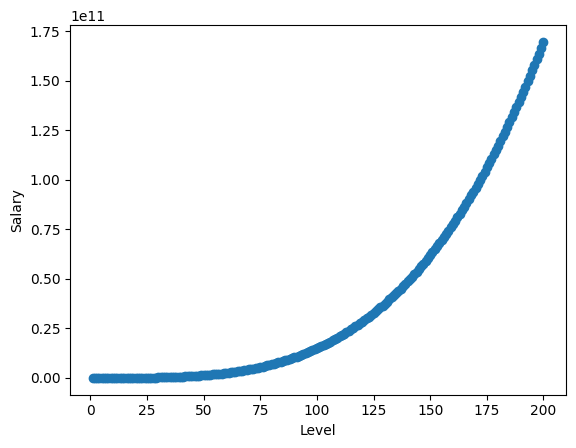

In [4]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Degrees of Polynomials

Linear (Degree 1): Y = β₀ + β₁X + ε (a straight line)

Quadratic (Degree 2): Y = β₀ + β₁X + β₂X² + ε (a curve) 

Cubic (Degree 3): Y = β₀ + β₁X + β₂X² + β₃X³ + ε (a more complex curve)

# Understanding The Formula

Y: The dependent variable, the outcome you are trying to predict. 

X: The independent variable, the input you are using for prediction. 

β₀: The intercept, or the value of Y when all X terms are zero. 

β₁, β₂, ..., β<0xE2><0x82><0x95>: The coefficients that determine the shape and slope of the polynomial curve.

X², X³, ..., X<0xE2><0x82><0x95>: The powers of the independent variable, which allow for modeling non-linear relationships. 

h: The degree of the polynomial. For example, h=2 is a quadratic regression, h=3 is cubic, and so on. 

ε: The residual, or error term, which accounts for the variability in Y not explained by the polynomial function

In [5]:
# check corr relationship
dataset.corr()

,Level,Salary
Level,1.000000,0.891298
Salary,0.891298,1.000000


In [6]:
x = dataset[["Level"]] # alway will be multi demenional
y = dataset["Salary"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pf = PolynomialFeatures(degree=3)

In [9]:
pf.fit(x)
x = pf.transform(x)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
lr.score(x_test,y_test)*100

99.99573171260158

In [15]:
prd = lr.predict(x)

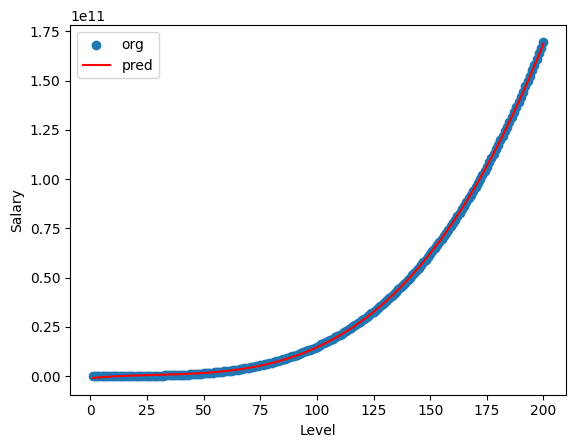

In [16]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.plot(dataset["Level"], prd, c="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org","pred"])
plt.show()

In [17]:
lr.coef_

array([ 0.00000000e+00,  1.09618567e+08, -2.76106868e+06,  3.23047337e+04])

In [18]:
lr.intercept_

np.float64(-1036689369.8715744)

In [27]:
# this is formula  of  pf = PolynomialFeatures(degree=2)
# y = m1x1 + m2x2^2 + c     formula
# y = -6.81828988e+08*x1 +  7.04223123e+06*x2^2 + 12072370896.183418 

In [20]:
# we will check predication salary upgrade level 
# we will take polynomial data for test

In [21]:
test = pf.transform([[45]]) # i will check in 45 level how do predict salary 
test

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.0000e+00, 4.5000e+01, 2.0250e+03, 9.1125e+04]])

In [22]:
lr.predict(test)

array([1.24875091e+09])

In [ ]:
# orginal dataset 45 level , salary was 916927625 

In [23]:
dataset.iloc[44]

Level            45.0
Salary    916927625.0
Name: 44, dtype: float64

In [25]:
# pf = PolynomialFeatures(degree=2)
# pf.fit(x)
# x = pf.transform(x)

# before i had been will give 2 degree in PolynomialFeatures then its not give us poor pedication
# then i applied 3 degree in PolynomialFeatures and its give us better prediction 

In [ ]:
# and have more better pedication u can increase degreee and your model are more accurate